Libreria

In [1]:

import pandas as pd
import openpyxl
from ydata_profiling import ProfileReport
import ipywidgets
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model




Conexion con el dataset

In [8]:
escuela= pd.read_excel('Dataset.xlsx')
escuela

,Nombre,asistencia,Tareas entregadas,Calificacion final
0,Diego Sierra,NaN,20.0,100
1,Zabdy Sanchez,30.0,19.0,98
2,Starlyn Paniagua,29.0,15.0,85
3,Juanito Alcachofa,15.0,3.0,38
4,Erwin Marmolejos,30.0,5.0,63
5,Richard Olivo,28.0,14.0,80
6,Mei yu Tan Deng,25.0,10.0,72
7,Francisco Frias,21.0,NaN,85
8,Maria Jose Tatis,30.0,20.0,100
9,Jeremy Chandel,17.0,9.0,69


Informacion sobre el Dataset

In [9]:
escuela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              20 non-null     object 
 1   asistencia          18 non-null     float64
 2   Tareas entregadas   18 non-null     float64
 3   Calificacion final  20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 772.0+ bytes


Quitar valores nulos o repetidos

In [10]:
columnas_especificas = ['asistencia', 'Tareas entregadas']

for columna in columnas_especificas:
    promedio = escuela[columna].mean() 
    escuela[columna].fillna(promedio, inplace=True)
escuela





,Nombre,asistencia,Tareas entregadas,Calificacion final
0,Diego Sierra,24.277778,20.000000,100
1,Zabdy Sanchez,30.000000,19.000000,98
2,Starlyn Paniagua,29.000000,15.000000,85
3,Juanito Alcachofa,15.000000,3.000000,38
4,Erwin Marmolejos,30.000000,5.000000,63
5,Richard Olivo,28.000000,14.000000,80
6,Mei yu Tan Deng,25.000000,10.000000,72
7,Francisco Frias,21.000000,13.166667,85
8,Maria Jose Tatis,30.000000,20.000000,100
9,Jeremy Chandel,17.000000,9.000000,69


In [11]:

escuela.drop_duplicates(inplace=True)
escuela

,Nombre,asistencia,Tareas entregadas,Calificacion final
0,Diego Sierra,24.277778,20.000000,100
1,Zabdy Sanchez,30.000000,19.000000,98
2,Starlyn Paniagua,29.000000,15.000000,85
3,Juanito Alcachofa,15.000000,3.000000,38
4,Erwin Marmolejos,30.000000,5.000000,63
5,Richard Olivo,28.000000,14.000000,80
6,Mei yu Tan Deng,25.000000,10.000000,72
7,Francisco Frias,21.000000,13.166667,85
8,Maria Jose Tatis,30.000000,20.000000,100
9,Jeremy Chandel,17.000000,9.000000,69


Análisis exploratorio de los datos

In [12]:
ProfileReport(escuela)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Modelo Predictivo para la asistencia

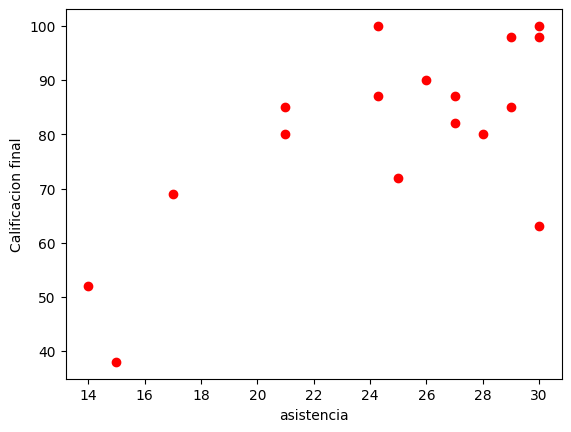

In [13]:

plt.ylabel('Calificacion final')
plt.xlabel("asistencia")
plt.scatter(escuela["asistencia"], escuela['Calificacion final'], color="red")

In [16]:
regresion_asis = linear_model.LinearRegression()
asistencia= escuela["asistencia"].values.reshape((-1,1))
modelo_asis= regresion_asis.fit(asistencia, escuela['Calificacion final'])
print('Interseccion (b)', modelo_asis.intercept_)
print("pendiente (m)", modelo_asis.coef_)

entrada_asis = [[30], [24], [25], [20]]
modelo_asis.predict(entrada_asis)




Interseccion (b) 24.271969999083538
pendiente (m) [2.28323273]


array([92.76895183, 79.06955546, 81.35278819, 69.93662455])

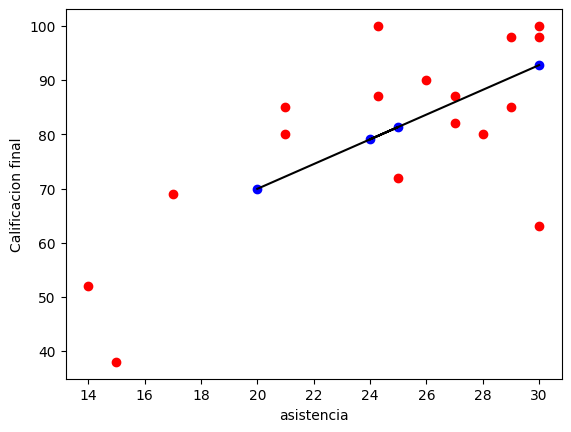

In [17]:
plt.scatter(entrada_asis, modelo_asis.predict(entrada_asis), color= 'blue')
plt.plot(entrada_asis, modelo_asis.predict(entrada_asis), color='black')

plt.ylabel('Calificacion final')
plt.xlabel("asistencia")
plt.scatter(escuela["asistencia"], escuela['Calificacion final'], color="red")

Modelo Predictivo para la asistencia

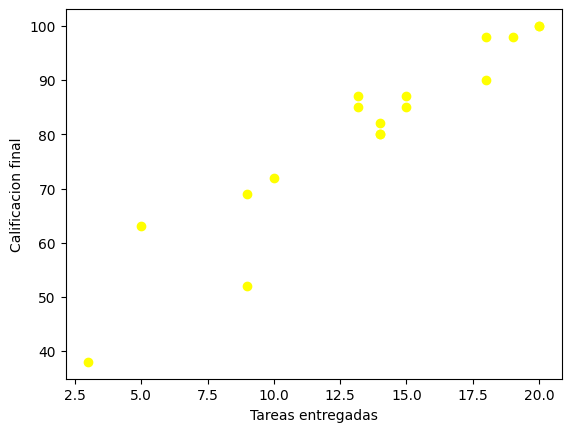

In [18]:
plt.ylabel('Calificacion final')
plt.xlabel("Tareas entregadas")
plt.scatter(escuela["Tareas entregadas"], escuela['Calificacion final'], color="yellow")

In [21]:
regresion_tar = linear_model.LinearRegression()
tareas= escuela["Tareas entregadas"].values.reshape((-1,1))
modelo_tar= regresion_tar.fit(tareas, escuela['Calificacion final'])
print('Interseccion (b)', modelo_tar.intercept_)
print("pendiente (m)", modelo_tar.coef_)

entrada_tar = [[20], [17], [18], [10]]
modelo_tar.predict(entrada_tar)

Interseccion (b) 36.43640595211569
pendiente (m) [3.25544084]


array([101.54522271,  91.7789002 ,  95.03434103,  68.99081433])

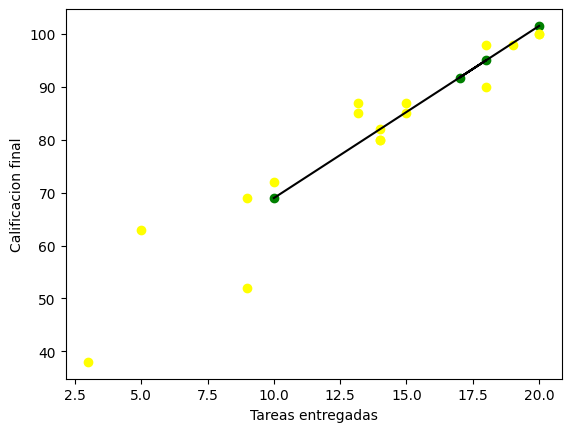

In [22]:
plt.scatter(entrada_tar, modelo_tar.predict(entrada_tar), color= 'green')
plt.plot(entrada_tar, modelo_tar.predict(entrada_tar), color='black')

plt.ylabel('Calificacion final')
plt.xlabel("Tareas entregadas")
plt.scatter(escuela["Tareas entregadas"], escuela['Calificacion final'], color="yellow")